# Triangulation with line sweep
Given a set of points in the 2D Euclidean plane produce a triangulation using vertical line sweep from west to east.

First we define helper classes and methods.

In [8]:
class Point:
    """
    Represents a point in a 2D Euclidean plane.
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    @property
    def tuplify(self):
        return self.x, self.y
        
    def __lt__(self, other):
        return self.tuplify < other.tuplify
        
    def __repr__(self):
        return str((self.x, self.y))

In [9]:
def orientation(p1, p2, p3):
    """
    We are given the triangle spanned on the points p1, p2 and p3.
    Return positive number if the triangle is positively oriented.
    Return positive number if the triangle is negatively oriented.
    Returns 0 if the triangle is degenerated.
    """
    a = (p2.x - p1.x, p2.y - p1.y)
    b = (p3.x - p1.x, p3.y - p1.y)
    return a[0]*b[1] - b[0]*a[1]

Test the orientation method on a simple test case.

In [10]:
a = Point(0, 0)
b = Point(1, 0)
c = Point(0, 1)
d = Point(2, 0)
assert orientation(a, b, c) > 0
assert orientation(a, b, d) == 0
assert orientation(a, c, b) < 0


In [11]:
class Node:
    """
    Node in a doubly linked link list.
    """
    def __init__(self, data):
        self.data = data
        self.p, self.n = self, self
    
    def link_after(self, new_node):
        '''
        Insert new_node into linked list after the self node.
        '''
        new_node.n, new_node.p = self.n, self
        self.n.p, self.n = new_node, new_node
    
    def __repr__(self):
        ret = "{0}".format(self.data)
        c = self
        while c.n != self:
            c = c.n
            ret += " <-> {0}".format(c.data)
        return ret

In [79]:
from random import random

def generify(points, epsilon=0.0001):
    """
    Jiggle the points coordinates just a little so that they are in the
    general position. 
    Returns the generator.
    """
    for point in points:
        e = 2*(random()-0.5)*epsilon
        d = 2*(random()-0.5)*epsilon*e
        yield Point(point.x + e, point.y + d)    

Now we can start with our main method. 

In [152]:
def triangulation(points):
    '''
    Construct line sweep triangulation.
    '''
    assert len(points) >= 3, 'Triangulation requires at least 3 points'
    points = sorted(generify((Point(x, y) for (x,y) in points)))
    nodes = [Node(point) for point in points]
    triangles = []
    triangles.append(points[:3])
    if orientation(*triangles[0]) < 0:
        nodes[0], nodes[1] = nodes[1], nodes[0]
    nodes[0].link_after(nodes[1]), nodes[1].link_after(nodes[2])
    for i in range(3, len(nodes)):
        print(nodes[i-1])
        add_node(nodes[i-1], nodes[i], triangles)
        print(nodes[i])
        print()
    return triangles
        
def add_node(start, new, triangles):
    '''
    Process one node (containing point), add appropriate triangles.
    '''
    current = start
    print('t1', new.data, current.n.data, current.data)
    while orientation(new.data, current.n.data, current.data) > 0:
        print('a1', new.data, current.n.data, current.data)
        triangles.append([new.data, current.n.data, current.data])
        current = current.n
        print('t1', new.data, current.n.data, current.data)
    last, current = current, start
    print('t2', new.data, current.data, current.p.data)
    while orientation(new.data, current.data, current.p.data) > 0:
        print('a2', new.data, current.data, current.p.data)
        triangles.append([new.data, current.data, current.p.data])
        current = current.p
        print('t2', new.data, current.data, current.p.data)
    print (last.data)
    print (current.data)
    new.n = last
    current.link_after(new)

Test the given method and plot the results.

<IPython.core.display.Javascript object>


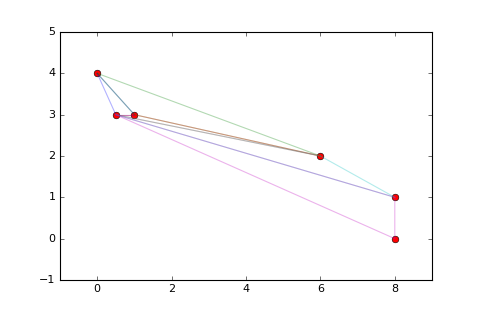

(1.000016946367954, 2.9999999990018567) <-> (-1.5104264638560162e-05, 3.999999999859261) <-> (0.49993863437752756, 3.00000000139666)
t1 (5.999962853145668, 1.9999999968286581) (-1.5104264638560162e-05, 3.999999999859261) (1.000016946367954, 2.9999999990018567)
a1 (5.999962853145668, 1.9999999968286581) (-1.5104264638560162e-05, 3.999999999859261) (1.000016946367954, 2.9999999990018567)
t1 (5.999962853145668, 1.9999999968286581) (0.49993863437752756, 3.00000000139666) (-1.5104264638560162e-05, 3.999999999859261)
t2 (5.999962853145668, 1.9999999968286581) (1.000016946367954, 2.9999999990018567) (0.49993863437752756, 3.00000000139666)
a2 (5.999962853145668, 1.9999999968286581) (1.000016946367954, 2.9999999990018567) (0.49993863437752756, 3.00000000139666)
t2 (5.999962853145668, 1.9999999968286581) (0.49993863437752756, 3.00000000139666) (-1.5104264638560162e-05, 3.999999999859261)
(-1.5104264638560162e-05, 3.999999999859261)
(0.49993863437752756, 3.00000000139666)
(5.999962853145668, 1.99

In [153]:
from matplotlib import pyplot
%matplotlib notebook  

points = [(1,3),(6,2),(0.5,3),(0,4),(8,1),(8,0)]
xs, ys = map(list, zip(*points))
pyplot.axis([min(xs)-1,max(xs)+1,min(xs)-1,max(ys)+1])
pyplot.plot( xs, ys, 'ro')

triangles = triangulation(points)
colors = "bgrcmykwbgrcmykwbgrcmykwbgrcmykw"

for i, (p1, p2, p3) in enumerate(triangles):
    pyplot.plot([p1.x, p2.x], [p1.y, p2.y], c=colors[i], alpha=0.3)
    pyplot.plot([p1.x, p3.x], [p1.y, p3.y], c=colors[i], alpha=0.3)
    pyplot.plot([p2.x, p3.x], [p2.y, p3.y], c=colors[i], alpha=0.3)

<IPython.core.display.Javascript object>


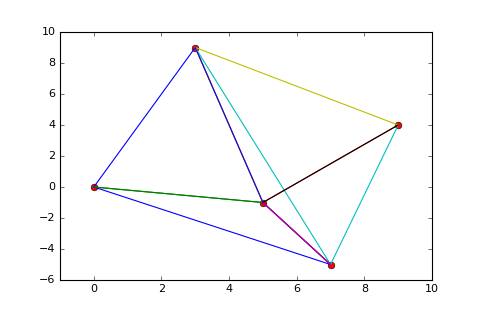

(5.000088923347306, -0.9999999969935888) <-> (2.999982513811863, 9.000000000736266) <-> (-7.83620735502579e-05, 4.525136593940856e-09)
t1 (6.999906337113608, -4.999999995925262) (2.999982513811863, 9.000000000736266) (5.000088923347306, -0.9999999969935888)
a1 (6.999906337113608, -4.999999995925262) (2.999982513811863, 9.000000000736266) (5.000088923347306, -0.9999999969935888)
t1 (6.999906337113608, -4.999999995925262) (-7.83620735502579e-05, 4.525136593940856e-09) (2.999982513811863, 9.000000000736266)
t2 (6.999906337113608, -4.999999995925262) (5.000088923347306, -0.9999999969935888) (-7.83620735502579e-05, 4.525136593940856e-09)
a2 (6.999906337113608, -4.999999995925262) (5.000088923347306, -0.9999999969935888) (-7.83620735502579e-05, 4.525136593940856e-09)
t2 (6.999906337113608, -4.999999995925262) (-7.83620735502579e-05, 4.525136593940856e-09) (2.999982513811863, 9.000000000736266)
(2.999982513811863, 9.000000000736266)
(-7.83620735502579e-05, 4.525136593940856e-09)
(6.9999063371

In [154]:
from matplotlib import pyplot
from random import randint
%matplotlib notebook  

#points = [(randint(1, 100), randint(1, 100)) for i in range(5)]
points = [(0,0),(3,9),(5,-1),(9,4), (7, -5)]
xs, ys = map(list, zip(*points))
pyplot.axis([min(xs)-1,max(xs)+1,min(ys)-1,max(ys)+1])
pyplot.plot( xs, ys, 'ro')

triangles = triangulation(points)

for i, (p1, p2, p3) in enumerate(triangles):
    pyplot.plot([p1.x, p2.x], [p1.y, p2.y])
    pyplot.plot([p1.x, p3.x], [p1.y, p3.y])
    pyplot.plot([p2.x, p3.x], [p2.y, p3.y])